In [99]:
%matplotlib inline
plt.style.use('ggplot')
df = pd.read_csv('cvs_products_cleaned.csv')

In [64]:
df.columns

Index(['ave_rating', 'brand', 'details', 'family', 'genus', 'name',
       'num_reviews', 'ounces', 'pounds', 'price', 'species', 'url',
       'ounces_from_lbs', 'lbs_from_oz', 'price_per_oz'],
      dtype='object')

In [12]:
print(df.family.unique())
print(df.genus.unique())
print(df.species.unique())


['beauty' 'skin-care' 'makeup' 'baby-child' 'personal-care' 'shop'
 'household-grocery' 'hair-care']
['hair-care' 'face' 'skin-care' 'bath-body' 'perfume-cologne' 'body'
 'nails' 'bath-skin-care' 'beauty-tools-accessories' 'incontinence'
 'hands-feet' 'oral-care' 'eyes' 'makeup' 'lips' 'lip-care' 'k-beauty'
 'beauty' 'deodorant' 'bags-wraps-storage' 'health' 'korean-makeup'
 'hair-removal' 'food-snacks' 'as-seen-on-tv' 'shampoo-conditioner'
 'massage-relaxation' 'treatments' 'styling' 'shaving' 'feminine-care']
['shampoo-conditioner' 'acne' 'sun-tanning' 'hand-sanitizer'
 'skin-care-tools' 'perfume-for-women' 'body-wash'
 'body-lotion-oils-sprays' 'moisturizers' 'lotions-creams'
 'firming-repair' 'bath-salts-soaks' 'face' 'treatments-removers'
 'cologne-for-men' 'creams-ointments' 'styling' 'nail-tools'
 'bath-accessories' 'soap' 'skin-care-medication' 'scrubs-treatments'
 'hand-cream' 'treatments' 'cotton' 'sunscreen' 'teeth-whitening'
 'makeup-removers-wipes' 'foot-cream' 'face-wash-

In [100]:
## Divide into families similar to Sephora
df = df.loc[~df['genus'].isin(['beauty-tools-accessories'])]

haircare = df.loc[(df['family'] == 'hair-care') | (df['genus'].str.contains('hair')) \
                  | (df['species'].str.contains('hair'))]
makeup = df.loc[(df['family'] == 'makeup') | (df['genus'].str.contains('makeup')) | \
                                              (df['species'].str.contains('makeup'))]
skincare = df.loc[(df['family'] == 'skin-care') | (df['genus'].str.contains('skin-care')) \
                 | (df['species'].str.contains('skin-care'))]
fragrance = df.loc[df['genus'].str.contains('fragrance') | df['genus'].str.contains('cologne') \
                  | df['species'].str.contains('fragrance') | df['species'].str.contains('cologne')]
men = df.loc[(df['genus'].str.contains('men') & ~df['genus'].str.contains('women')) |
            (df['species'].str.contains('men') & ~df['species'].str.contains('women'))]
bath_body = df.loc[df['genus'].str.contains('bath') | df['species'].str.contains('bath')]
baby_child = df.loc[df['family']=='baby-child']

In [101]:
hairbrands = haircare.groupby('brand').filter(lambda x: x.shape[0]>= 15)
makeupbrands = makeup.groupby('brand').filter(lambda x: x.shape[0]>= 5)
skinbrands = skincare.groupby('brand').filter(lambda x: x.shape[0]>= 15)
fragbrands = fragrance.groupby('brand').filter(lambda x: x.shape[0]>= 5)
menbrands = men.groupby('brand').filter(lambda x: x.shape[0]>= 5)
bathbrands = bath_body.groupby('brand').filter(lambda x: x.shape[0]>= 4)

print(len(hairbrands.groupby('brand')), len(makeupbrands.groupby('brand')), len(skinbrands.groupby('brand')), 
      len(fragbrands.groupby('brand')), len(menbrands.groupby('brand')), len(bathbrands.groupby('brand')))

37 34 43 41 57 50


In [84]:
def boxplot_sorted(df, by, column, rot=0 **kwargs):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", **kwargs) #, showfliers=False, color='b')
     

<Figure size 720x360 with 0 Axes>

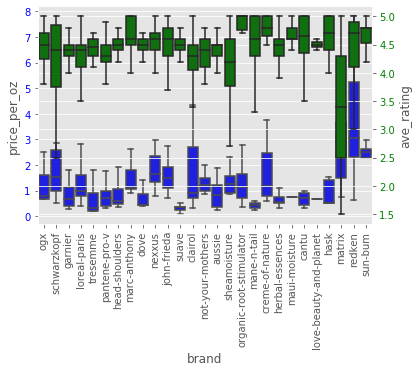

In [128]:
hairbrands_rated = hairbrands.groupby('brand').filter(lambda x: x.num_reviews.count() >= 10)
import seaborn as sns
fig = plt.figure(figsize=(10,5))
fig, ax1 = plt.subplots()
plot1 = sns.boxplot(x='brand', y='price_per_oz', hue=None, data=hairbrands_rated, order=None, hue_order=None, orient=None, 
                color='b', palette=None, saturation=0.75, width=0.8, dodge=True, showfliers=False,
                fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax1)
ax2 = ax1.twinx()
plot2 = sns.boxplot(x='brand', y='ave_rating', hue=None, data=hairbrands_rated, order=None, hue_order=None, orient=None, 
                color='g', palette=None, saturation=0.75, width=0.8, dodge=True, showfliers=False,
                fliersize=5, linewidth=None, whis=1.5, notch=False, ax=ax2)
ax1.tick_params(axis='y', labelcolor='b')
xticklabels = plot1.get_xticklabels()
plot1.set_xticklabels(xticklabels, rotation=90)
ax2.tick_params(axis='y', labelcolor='g')

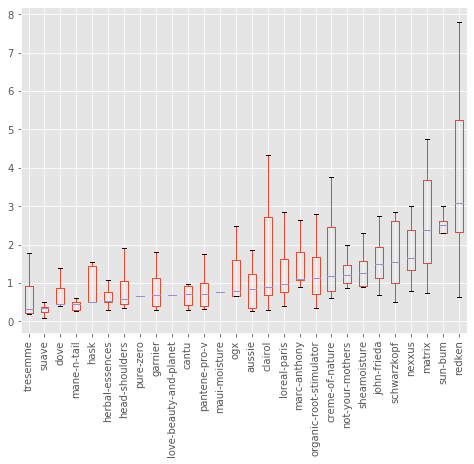

In [77]:
plt.figure(figsize=(8,6))
boxplot_sorted(hairbrands_rated, by='brand', column='price_per_oz', rot=90)

In [60]:
hairbrands.loc[hairbrands['brand'].isin(['conair','earth-therapeutics','scunci','donna'])]

,ave_rating,brand,details,family,genus,name,num_reviews,ounces,pounds,price,species,url,ounces_from_lbs,lbs_from_oz,price_per_oz
1080,3.6,conair,Sleek pearlized handle design. Create small to...,beauty,beauty-tools-accessories,Conair Curling Iron,13.0,NaN,0.51,10.49,hair-tools-appliances,https://www.cvs.com/shop/conair-curling-iron-p...,8.16,0.51,NaN
1653,4.8,conair,Turbo Heat: Ultra-hot for maximum styling powe...,beauty,beauty-tools-accessories,Conair Instant Heat Curling Iron,4.0,NaN,0.57,19.49,hair-tools-appliances,https://www.cvs.com/shop/conair-instant-heat-c...,9.12,0.57,NaN
1673,5.0,conair,Model CD 108FN. Professional series. Nano Tour...,beauty,beauty-tools-accessories,Conair Infiniti Pro Tourmaline Ceramic Curling...,2.0,NaN,1.21,37.49,hair-tools-appliances,https://www.cvs.com/shop/conair-infiniti-pro-t...,19.36,1.21,NaN
1721,5.0,scunci,12 small black barrettes. CHOKING HAZARD - Sma...,beauty,beauty-tools-accessories,"Scunci All-Day Hold Black Snap Clips, 12CT",1.0,NaN,0.04,4.29,hair-accessories,https://www.cvs.com/shop/scunci-all-day-hold-b...,0.64,0.04,NaN
1722,5.0,scunci,All-Day Wear,beauty,beauty-tools-accessories,"Scunci Medium Hold Denim Assorted Ponytailers,...",2.0,NaN,0.06,3.59,hair-accessories,https://www.cvs.com/shop/scunci-medium-hold-de...,0.96,0.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9528,NaN,scunci,No damage® No slip grip® Super comfy scun...,beauty,beauty-tools-accessories,"Scunci Everyday & Active No-Slip Head Bands, 2CT",NaN,NaN,0.12,5.59,hair-accessories,https://www.cvs.com/shop/scunci-everyday-activ...,1.92,0.12,NaN
9627,4.3,donna,DONNA™ #11072 CLEAR Conditioning | Processing ...,beauty,beauty-tools-accessories,Donna Disposable Plastic Caps,3.0,NaN,0.24,4.99,hair-accessories,https://www.cvs.com/shop/donna-disposable-plas...,3.84,0.24,NaN
9628,NaN,scunci,no damage® scunci® everyday & active™ accessor...,beauty,beauty-tools-accessories,"Scunci Everyday & Active No Damage Elastics, 18CT",NaN,NaN,0.12,3.29,hair-accessories,https://www.cvs.com/shop/scunci-everyday-activ...,1.92,0.12,NaN
9668,3.0,scunci,no • slip grip ® ULTRA comfy FEEL the differen...,beauty,beauty-tools-accessories,Scunci Everyday & Active No-Slip Wide Head Band,1.0,NaN,0.10,7.29,hair-accessories,https://www.cvs.com/shop/scunci-everyday-activ...,1.60,0.10,NaN
